In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
fire_size_train_labels = np.load('fire_size_train_labels_allyears.npy')
fire_size_train = np.load('fire_size_train_allyears.npy')

In [5]:
fire_negative_train = np.load('fire_negative_train_alldata.npy')

In [6]:
data_years = np.load("data_years.npy")

In [12]:
negative_classification_labels = np.zeros(fire_negative_train.shape[0])
positive_classification_labels = np.ones(fire_size_train.shape[0])

In [523]:
# fire_size_train_labels[fire_size_train_labels > 1]  = 1

In [524]:
# np.unique(fire_size_train_labels, return_counts=True)

(array([0, 1]), array([1943,  982], dtype=int64))

In [525]:
# fire_size_train_labels = tf.keras.utils.to_categorical(fire_size_train_labels, num_classes=1)

In [526]:
# new_idx_0 = np.where(fire_size_train_labels == 0)[0][:982]
# new_idx_1 = np.where(fire_size_train_labels == 1)[0][:982]

In [527]:
# fire_size_train = np.vstack([fire_size_train[new_idx_0], fire_size_train[new_idx_1]])
# fire_size_train_labels = np.hstack([fire_size_train_labels[new_idx_0], fire_size_train_labels[new_idx_1]])

In [7]:
train_idx = np.where(((data_years <= 2017)))
val_idx = np.where(((data_years > 2017) & (data_years < 2020)))
test_idx = np.where(((data_years == 2020)))

In [106]:
fire_size_train_labels = (np.log10(fire_size_train_labels) + 2) #/ 4

In [45]:
for i in range(6):
    fire_size_train[:, :, i] = (fire_size_train[:, :, i] - fire_size_train[:, :, i].min())/(fire_size_train[:, :, i].max() - fire_size_train[:, :, i].min())

In [23]:
for i in range(6):
    fire_size_train[:, :, i] = (fire_size_train[:, :, i] - fire_size_train[:, :, i].mean())/(fire_size_train[:, :, i].std())

In [24]:
for i in range(6):
    fire_negative_train[:, :, i] = (fire_negative_train[:, :, i] - fire_negative_train[:, :, i].mean())/(fire_negative_train[:, :, i].std())

In [74]:
# fire_size_train = fire_size_train[:, :, :6]
# fire_negative_train = fire_negative_train[:, :, :6]

IndexError: index 6 is out of bounds for axis 2 with size 6

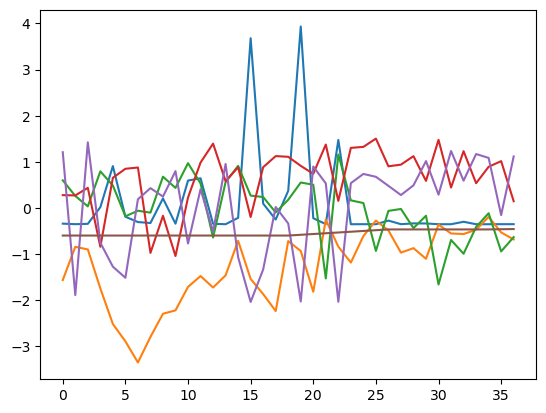

In [75]:
idx = 14
lbs = ['tp', 't2m', 'hum', 'u10', 'v10', 'modis', 'days']
for i in range(7):
    plt.plot(fire_size_train[idx, :, i], label = lbs[i])
plt.legend()
print(fire_size_train_labels[idx])

0.025118864315095794


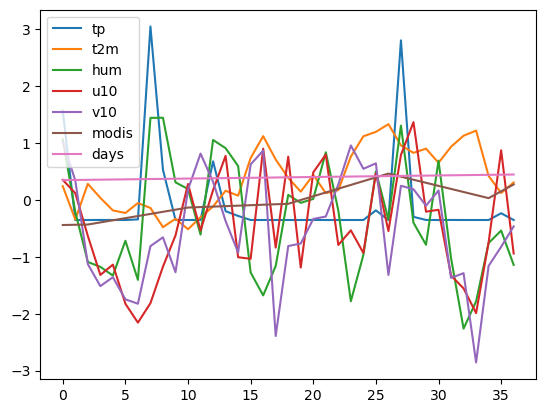

In [23]:
idx = 1810
lbs = ['tp', 't2m', 'hum', 'u10', 'v10', 'modis', 'days']
for i in range(7):
    plt.plot(fire_size_train[idx, :, i], label = lbs[i])
plt.legend()
print(10**(fire_size_train_labels[idx]*4 - 2))

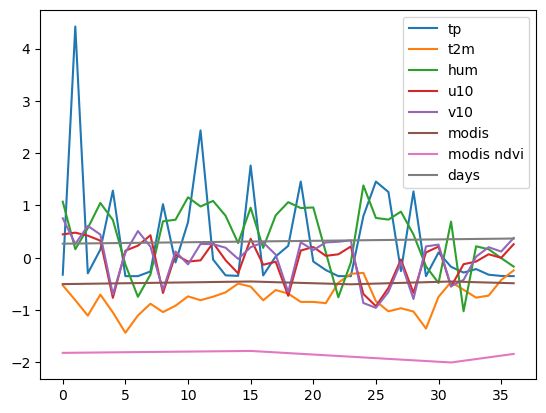

In [72]:
idx = 200
lbs = ['tp', 't2m', 'hum', 'u10', 'v10', 'modis', 'modis ndvi', 'days']
for i in range(8):
    plt.plot(X_train[idx, :, i], label = lbs[i])
plt.legend()
# print(10**(fire_size_train_labels[idx]*4 - 2))

In [10]:

full_train_x = np.vstack([fire_size_train, fire_negative_train])


In [233]:
full_train_y = np.hstack([positive_classification_labels, negative_classification_labels])

In [108]:
fire_size_train_labels.min()

1.041392685158225

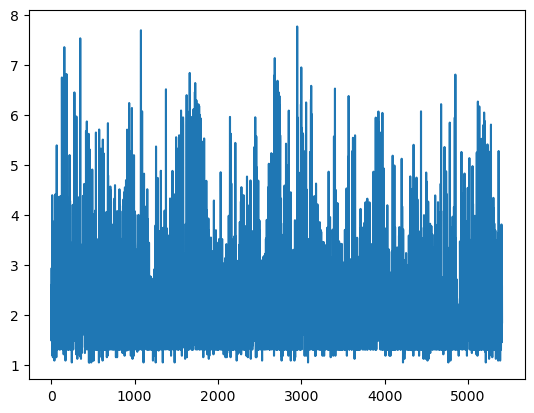

In [129]:
plt.plot(fire_size_train_labels)

In [109]:
full_train_y = np.hstack([fire_size_train_labels, negative_classification_labels])

In [28]:
fire_size_train_labels += 1

In [13]:
np.random.shuffle(train_idx[0])
# np.random.shuffle(val_idx[0])
# np.random.shuffle(test_idx[0])

In [110]:
X_train = full_train_x[train_idx]
y_train = full_train_y[train_idx]

X_val = full_train_x[val_idx]
y_val = full_train_y[val_idx]

X_test = full_train_x[test_idx]
y_test = full_train_y[test_idx]

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(full_train_x, full_train_y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [111]:
for i in range(7):
    X_train[:, :, i] = (X_train[:, :, i] - X_train[:, :, i].mean())/(X_train[:, :, i].std())
for i in range(7):
    X_val[:, :, i] = (X_val[:, :, i] - X_val[:, :, i].mean())/(X_val[:, :, i].std())
for i in range(7):
    X_test[:, :, i] = (X_test[:, :, i] - X_test[:, :, i].mean())/(X_test[:, :, i].std())                                                                                

In [240]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)

In [82]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [83]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)

In [84]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [85]:
clf.fit(X_train_flat, y_train)

SVC()

In [86]:
np.sum((clf.predict(X_test_flat)-y_test)**2)/len(y_test)

0.2680769230769231

In [ ]:
np.sum((clf.predict(X_test_flat)-y_test)**2)

96

In [91]:
clf.predict(X_test_flat)[:100]

array([1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.])

In [89]:
y_test[:100]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

In [112]:
X_train.shape, y_train.shape

((14096, 37, 8), (14096,))

In [113]:
X_test.shape, y_test.shape

((249, 37, 8), (249,))

In [ ]:
inputs = tf.keras.Input(shape=X_train.shape[1:])
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

In [ ]:
checkpoint_filepath = './model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
model.compile(optimizer=optimizer,loss='mse')

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs=100,
    validation_data = (X_val, y_val),
    callbacks=[model_checkpoint_callback],
    # class_weight=class_weight
)
model.load_weights(checkpoint_filepath)

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 0.2991 - val_loss: 0.1981
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1540 - val_loss: 0.1852
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1395 - val_loss: 0.1427
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1198 - val_loss: 0.1366
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1131 - val_loss: 0.1355
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1010 - val_loss: 0.1301
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0973 - val_loss: 0.1295
Epoch 8/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0920 - val_loss: 0.1258
Epoch 9/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0867 - val_loss: 0.1272
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0833 - val_loss: 0.1245
Epoch 11/100
9/9 [==

In [ ]:
# y_pred = (model.predict(X_test) > 0.5).astype(int)[:, 0]
y_pred = model.predict(X_test)

In [ ]:
np.sum((y_test - y_pred)**2)/len(y_test)

23.604093320555602

In [ ]:
np.sum(np.abs(y_test - y_pred))

105

In [ ]:
y_train.sum()/y_train.shape

array([0.50636943])

In [ ]:
np.sum(y_train == 0)

860

In [ ]:
X_train_nozeros = np.concatenate([X_train[y_train != 0], X_train[y_train == 0][:400]])

In [ ]:
y_train_nozeros = np.concatenate([y_train[y_train != 0], y_train[y_train == 0][:400]])

In [165]:
y_train[:64]

array([0.        , 1.47712125, 1.        , 2.50514998, 3.37657696,
       0.        , 0.        , 1.47712125, 1.39794001, 1.        ,
       0.        , 1.        , 1.60205999, 0.        , 1.60205999,
       2.        , 0.        , 0.        , 0.        , 2.07918125,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.60205999, 0.        , 0.        , 1.30103   ,
       0.        , 4.09342169, 1.69897   , 0.        , 0.        ,
       1.        , 1.30103   , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.69897   , 0.        ,
       0.        , 0.        , 1.        , 2.81954394, 0.        ,
       0.        , 2.161368  , 0.        , 0.        , 0.        ,
       0.        , 1.30103   , 0.        , 0.        , 0.        ,
       1.30103   , 1.60205999, 2.80753503, 0.        ])

In [113]:
K.clip(y_train, 0, 1)

<tf.Tensor: shape=(10397,), dtype=float64, numpy=array([0., 1., 1., ..., 0., 1., 0.])>

In [18]:
import keras.backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    condition = y_true > 0.001
    mask = tf.where(condition, x=tf.constant(1.), y=tf.constant(0.))
    
    precision = precision_m(mask, y_pred)
    recall = recall_m(mask, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [132]:
import keras.backend as K

def my_loss_fn(y_true, y_pred):
    condition = y_true > 0.001
    mask = tf.where(condition, x=tf.constant(1.), y=tf.constant(0.))
    
    squared_difference = K.square(mask - y_pred) * (y_true + tf.constant(1.))
    # squared_difference = K.square(y_true - y_pred) * (mask)
    return K.mean(squared_difference, axis=-1)

In [133]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

lstm_size = 32
model_lstm = tf.keras.Sequential()
# model_lstm.add(tf.keras.layers.LayerNormalization())
model_lstm.add(tf.keras.layers.LSTM(lstm_size, activation='tanh', input_shape=(37, 8)))
model_lstm.add(tf.keras.layers.Dense(lstm_size, activation='relu'))
model_lstm.add(tf.keras.layers.Dropout(0.5))
model_lstm.add(tf.keras.layers.Dense(lstm_size//2, activation='relu'))
# model_lstm.add(tf.keras.layers.Dropout(0.5))
# model_lstm.add(tf.keras.layers.Dense(lstm_size//4, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1))
# model_lstm.compile(optimizer=optimizer, loss="mse",metrics=[f1_m])
model_lstm.compile(optimizer=optimizer, loss=my_loss_fn,metrics=[f1_m])
# model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=[f1_m])


In [162]:


optimizer = tf.keras.optimizers.Adam(lr=0.0001)

lstm_size = 64
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(lstm_size, return_sequences=True, input_shape=(37, 8)))
model_lstm.add(tf.keras.layers.LSTM(lstm_size))
model_lstm.add(tf.keras.layers.Dense(lstm_size, activation='relu'))
model_lstm.add(tf.keras.layers.Dropout(0.5))
model_lstm.add(tf.keras.layers.Dense(lstm_size//2, activation='relu'))
model_lstm.add(tf.keras.layers.Dropout(0.5))
model_lstm.add(tf.keras.layers.Dense(lstm_size//4, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer=optimizer, loss=my_loss_fn,metrics=[f1_m])
# model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy', f1_m])


In [134]:
class_weight={0:0.3, 1:0.7}

checkpoint_filepath_lstm = './model_lstm.h5'
model_checkpoint_callback_lstm = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_lstm, 
    monitor='val_loss',
    mode='min',
    save_best_only=True)


history = model_lstm.fit(
    X_train, y_train,
    batch_size = 32,
    epochs=30,
    validation_data = (X_val, y_val), 
    callbacks=[model_checkpoint_callback_lstm],
    # class_weight=class_weight
)
model_lstm.load_weights(checkpoint_filepath_lstm)

Epoch 1/30
441/441 [==============================] - 7s 10ms/step - loss: 0.6183 - f1_m: 0.3317 - val_loss: 0.3796 - val_f1_m: 0.2643
Epoch 2/30
441/441 [==============================] - 3s 8ms/step - loss: 0.3869 - f1_m: 0.5623 - val_loss: 0.3470 - val_f1_m: 0.2933
Epoch 3/30
441/441 [==============================] - 4s 8ms/step - loss: 0.3488 - f1_m: 0.5955 - val_loss: 0.3316 - val_f1_m: 0.2961
Epoch 4/30
441/441 [==============================] - 3s 8ms/step - loss: 0.3149 - f1_m: 0.6305 - val_loss: 0.3174 - val_f1_m: 0.2986
Epoch 5/30
441/441 [==============================] - 4s 8ms/step - loss: 0.2915 - f1_m: 0.6569 - val_loss: 0.2972 - val_f1_m: 0.3022
Epoch 6/30
441/441 [==============================] - 4s 8ms/step - loss: 0.2778 - f1_m: 0.6706 - val_loss: 0.2932 - val_f1_m: 0.2957
Epoch 7/30
441/441 [==============================] - 3s 7ms/step - loss: 0.2655 - f1_m: 0.6804 - val_loss: 0.2800 - val_f1_m: 0.3013
Epoch 8/30
441/441 [==============================] - 3s 8ms/

In [124]:
# y_pred = (model_lstm.predict(X_test) > 0.5).astype(int)[:, 0]
y_pred = model_lstm.predict(X_test)

In [125]:
y_pred

array([[0.28945825],
       [0.28727442],
       [0.28727442],
       [0.67873335],
       [0.89931095],
       [0.68512326],
       [0.8145599 ],
       [0.8738967 ],
       [0.8885703 ],
       [0.87433654],
       [0.62837636],
       [0.873814  ],
       [0.9038816 ],
       [0.32849437],
       [0.8507378 ],
       [0.8274857 ],
       [0.79475176],
       [0.8702476 ],
       [0.8061347 ],
       [0.80888444],
       [0.8017697 ],
       [0.8091226 ],
       [0.8309002 ],
       [0.84755534],
       [0.81850296],
       [0.84369874],
       [0.78884304],
       [0.81136984],
       [0.826097  ],
       [0.79145545],
       [0.8214873 ],
       [0.5733795 ],
       [0.8144443 ],
       [0.84147394],
       [0.6636161 ],
       [0.42269653],
       [0.3219952 ],
       [0.65748847],
       [0.4622763 ],
       [0.7420939 ],
       [0.80215794],
       [0.40090364],
       [0.75493664],
       [0.83252305],
       [0.71604776],
       [0.70480335],
       [0.86293226],
       [0.833

In [50]:
y_pred = (y_pred > 0.5).astype(int)[:, 0]

In [126]:
np.sum(np.abs(y_test-y_pred[:, 0]))/len(y_test)

0.7539248317952632

In [41]:
y_pred.shape

(249, 1)

In [39]:
np.argmax(y_test)

67

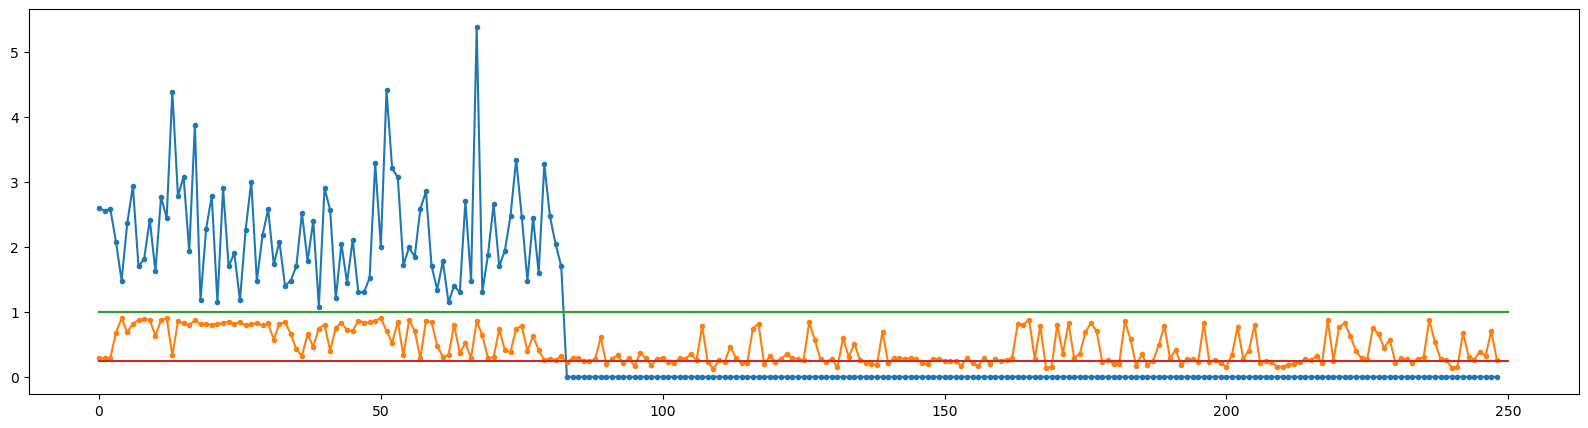

In [127]:
fig,ax = plt.subplots(1, figsize=(20,5))
plt.plot(y_test, marker='.')
plt.plot(y_pred, marker='.')
plt.plot([0, 250],[1, 1])
plt.plot([0, 250],[0.25, 0.25])

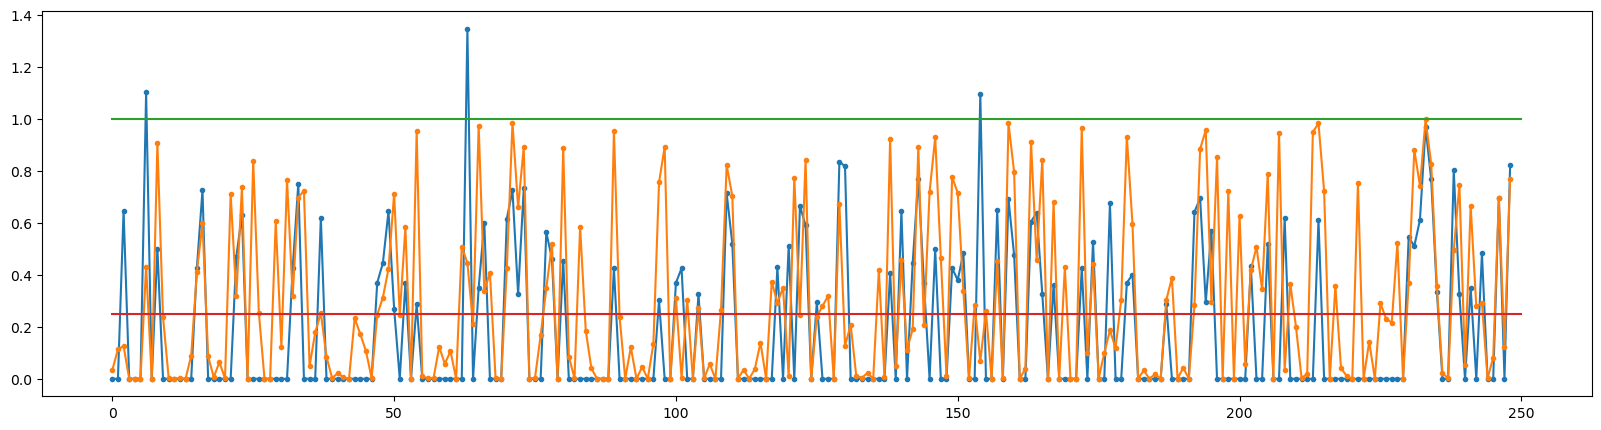

In [171]:
fig,ax = plt.subplots(1, figsize=(20,5))
plt.plot(y_test, marker='.')
plt.plot(y_pred, marker='.')
plt.plot([0, 250],[1, 1])
plt.plot([0, 250],[0.25, 0.25])

(0.0, 100.0)

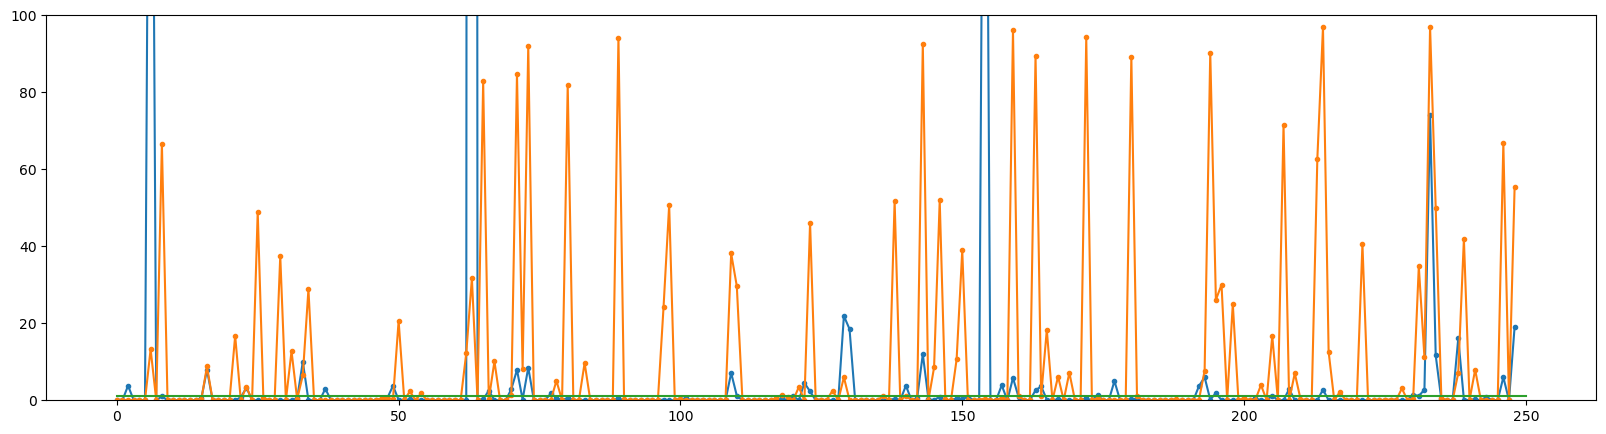

In [147]:
fig,ax = plt.subplots(1, figsize=(20,5))
plt.plot(10**(y_test*4-2), marker='.')
plt.plot(10**(y_pred*4-2), marker='.')
plt.plot([0, 250],[1, 1])
plt.ylim(0, 100)

In [37]:
def recall_m(y_true, y_pred):
    true_positives = np.sum(np.round(np.clip(y_true * y_pred, 0, 1)))
    possible_positives = np.sum(np.round(np.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 1e-7)
    return recall

def precision_m(y_true, y_pred):
    true_positives = np.sum(np.round(np.clip(y_true * y_pred, 0, 1)))
    predicted_positives = np.sum(np.round(np.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + 1e-7)
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+1e-7))

In [38]:
f1_m(y_test, y_pred)

0.7892536821194595

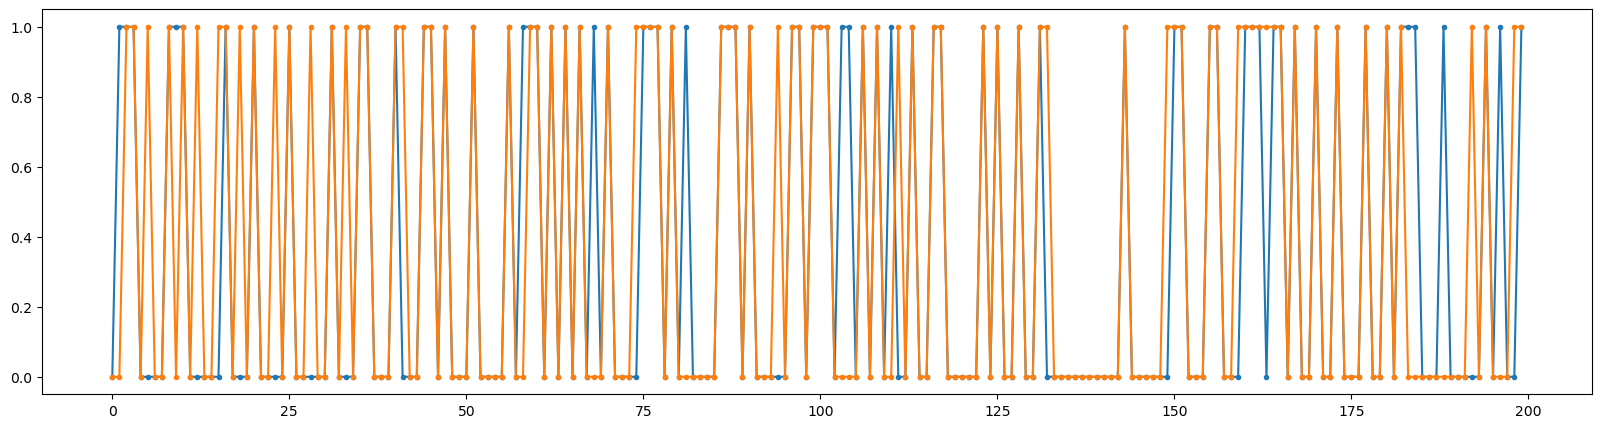

In [139]:
fig,ax = plt.subplots(1, figsize=(20,5))
plt.plot(y_test[:200], marker='.')
plt.plot(y_pred[:200], marker='.')

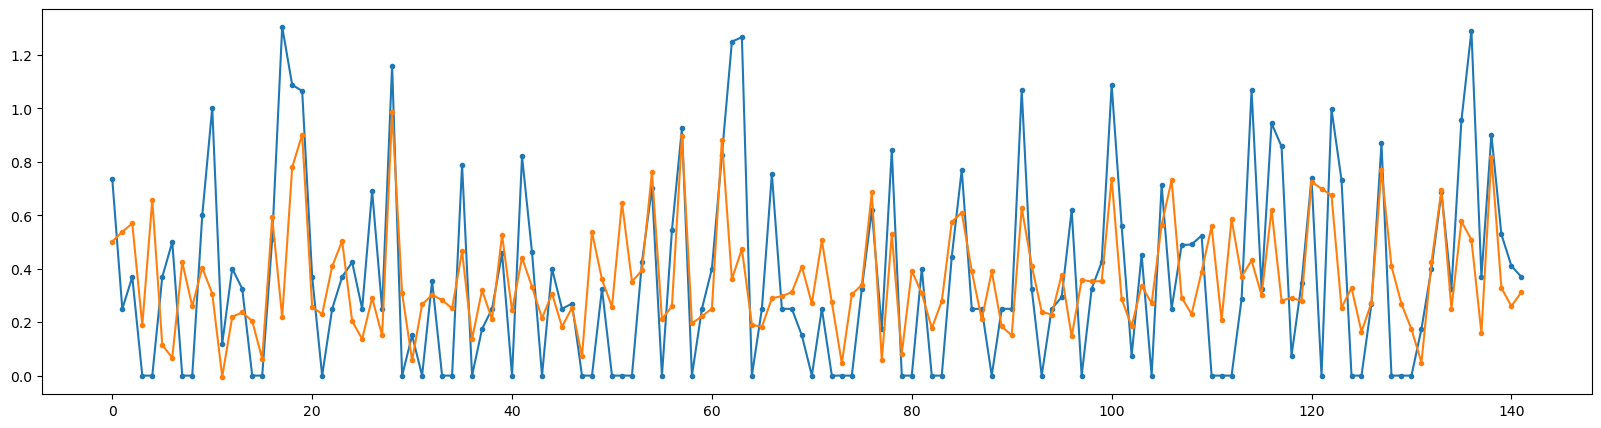

In [764]:
fig,ax = plt.subplots(1, figsize=(20,5))
plt.plot(y_test, marker='.')
plt.plot(y_pred, marker='.')

In [338]:
np.sum((y_pred - y_test)**2)/len(y_test)

48.48235578229769

In [514]:
1 - np.sum(np.abs(y_test - y_pred))/len(y_test)

0.7365079365079366

In [6]:
model_lstm.load_weights('model_lstm.h5')

In [38]:
all_data = np.load('all_state_2010_06.npy')

In [39]:
for i in range(6):
    all_data[:, :, i] = (all_data[:, :, i] - all_data[:, :, i].mean())/(all_data[:, :, i].std())

In [93]:
# all_data = all_data[:, :, :6]

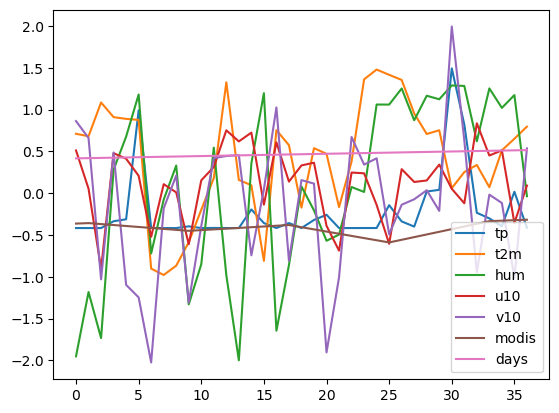

In [40]:
idx = 181
lbs = ['tp', 't2m', 'hum', 'u10', 'v10', 'modis', 'days']
for i in range(7):
    plt.plot(all_data[idx, :, i], label = lbs[i])
plt.legend()

In [272]:
pred_all = model_lstm.predict(all_data)

In [208]:
pred_all.max()

3.0000792

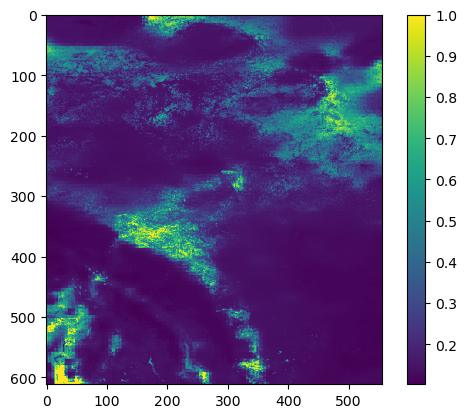

In [274]:
plt.imshow(pred_all.reshape(612, 556), vmax=1)
plt.colorbar()

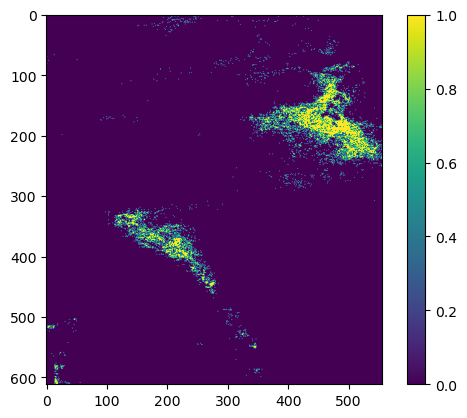

In [65]:
plt.imshow(pred_all.reshape(612, 556)>1)

plt.colorbar()

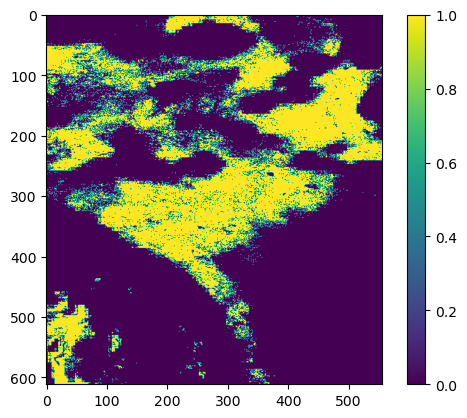

In [171]:
plt.imshow(pred_all.reshape(612, 556)>0.4)

plt.colorbar()